In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load the dataset

In [35]:
# Load the Wine dataset
wine_data = load_wine()

# Access the features and targets of the dataset
X = wine_data.data
y = wine_data.target

feature_names = wine_data.feature_names
target_names = wine_data.target_names

In [36]:
feature_names, target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

## Feature vectors normalization

In [37]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Finding pivots (centroids)

Using kNN select 10 pivots in each class (clusterize each class into 10 clusters and select the centroids)

In [38]:
# Number of clusters in each class
k = 10

n_classes = len(target_names)
n_features = X.shape[1]
n_samples = X.shape[0]

centroids = []

kmeans = KMeans(n_clusters=k)

for i in range(n_classes):
    X_class = X_scaled[y == i]
    kmeans.fit(X_class)

    class_centroids = kmeans.cluster_centers_
    centroids.append(class_centroids)

In [39]:
n_samples

178

## $X1$ dataset ($mK$-dimensional space representation of $X$)

Calculate representation X1 of initial N-D data set X in mK dimensional space, where new sample features x1i(j) are equal to x1i(j) =f(xi *yj) where * is the dot product and f(.) is an activation function.

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X1 = np.zeros((n_samples, k * n_classes))

for i in range(n_samples):
    for j in range(n_classes):
        for m in range(k):
            X1[i, j * k + m] = sigmoid(np.dot(X_scaled[i], centroids[j][m]))
            
X1.shape, X.shape

((178, 30), (178, 13))

## tSNE visualization of $X$ and $X1$ dataset

Use tSNE for visualization of the X and X1 data set.

In [41]:
tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(X_scaled)
X1_tsne = tsne.fit_transform(X1)

X_tsne.shape, X1_tsne.shape

((178, 2), (178, 2))

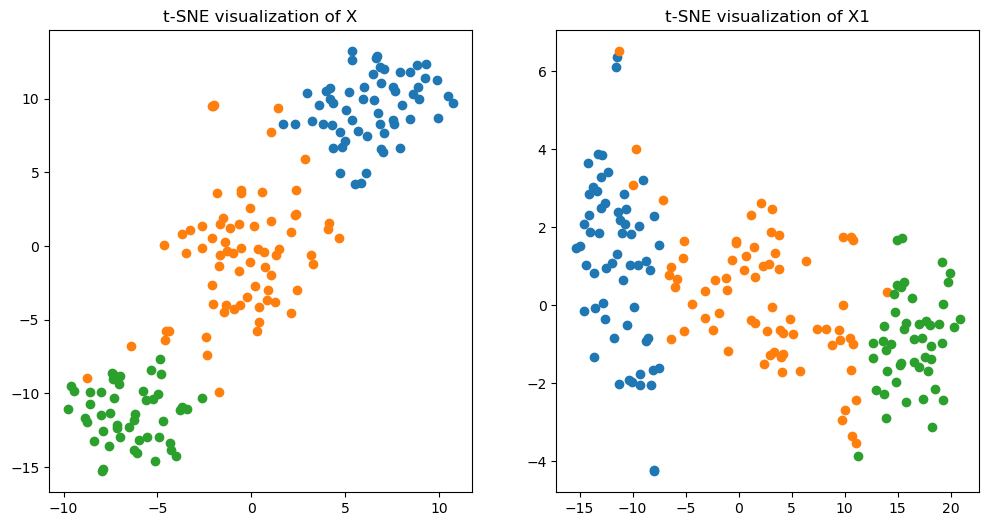

In [43]:
def plot_tsne_visualization(X_tsne, y, n_classes, target_names, title):
    for i in range(n_classes):
        plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=target_names[i])
    plt.title(title)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_tsne_visualization(X_tsne, y, n_classes, target_names, "t-SNE visualization of X")

plt.subplot(1, 2, 2)
plot_tsne_visualization(X1_tsne, y, n_classes, target_names, "t-SNE visualization of X1")